#** Install Packages**

In [1]:
pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 39kB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
     |████████████████████████████████| 450kB 58.6MB/s 
     |████████████████████████████████| 3.9MB 51.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=c982dba1982e3a27421f9be9fd635a957bd202aa817f8f9340e1acf78de5a817
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully 

In [2]:
pip install keras==2.3.1

     |████████████████████████████████| 378kB 13.6MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [3]:
#import libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [4]:
# for accuracy and loss graph
import matplotlib.pyplot as plt

In [5]:
import tensorflow

In [6]:
print(keras.__version__)
print(tensorflow.__version__)

2.3.1
2.1.0


In [7]:
train_data_path = "/content/drive/MyDrive/Data Science Projects/DL Projects/Face Mask Detection/Dataset/train"
validation_data_path = "/content/drive/MyDrive/Data Science Projects/DL Projects/Face Mask Detection/Dataset/valid"

In [8]:
# show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [9]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [10]:
# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(200, 200), # all images will be resized to 150x150
                                      batch_size=128,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 3649 images belonging to 2 classes.


In [11]:
training_data.class_indices

{'with_mask': 0, 'without_mask': 1}

In [12]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)
 
# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(200,200),
                                  batch_size=128,
                                  class_mode='binary')

Found 806 images belonging to 2 classes.


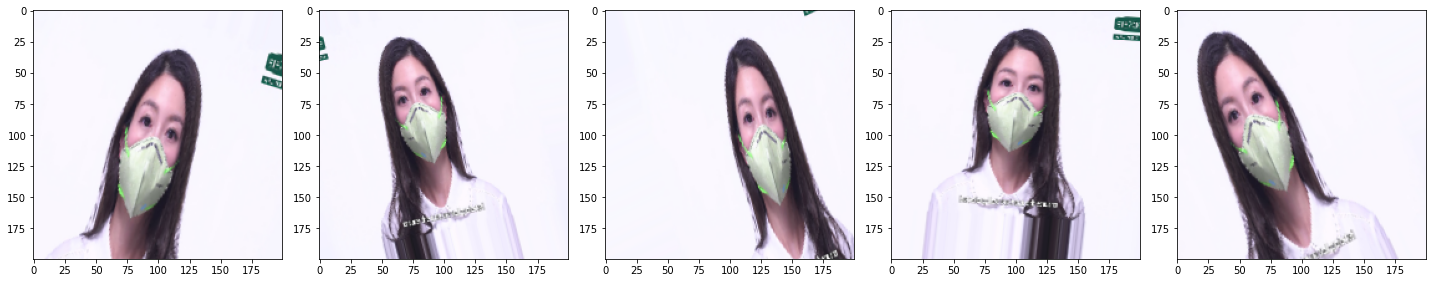

In [13]:
# showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [14]:
# save best model using vall accuracy
model_path = '/content/drive/MyDrive/Data Science Projects/DL Projects/Face Mask Detection/model/model.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [15]:
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=5, input_shape=[200, 200, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(4,4)),
                                    keras.layers.Conv2D(filters=64, kernel_size=4),
                                    keras.layers.MaxPooling2D(pool_size=(3,3)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=2),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])
 

In [16]:
# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#cnn_model.compile(optimizer = Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
 

In [17]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=50, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) # time start 14.25

Epoch 1/50


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 23 could not be retrieved. It could be because a worker has died.
  UserWarning)


 1/29 [>.............................] - ETA: 30:32 - loss: 0.7145 - accuracy: 0.4766

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 8 could not be retrieved. It could be because a worker has died.
  UserWarning)


 2/29 [=>............................] - ETA: 25:43 - loss: 0.7075 - accuracy: 0.5352

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 4 could not be retrieved. It could be because a worker has died.
  UserWarning)


 3/29 [==>...........................] - ETA: 24:58 - loss: 0.6905 - accuracy: 0.5781

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 22 could not be retrieved. It could be because a worker has died.
  UserWarning)


 4/29 [===>..........................] - ETA: 24:03 - loss: 0.6940 - accuracy: 0.5625

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 26 could not be retrieved. It could be because a worker has died.
  UserWarning)


 5/29 [====>.........................] - ETA: 23:12 - loss: 0.6866 - accuracy: 0.5828

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 18 could not be retrieved. It could be because a worker has died.
  UserWarning)


 7/29 [======>.......................] - ETA: 18:24 - loss: 0.6681 - accuracy: 0.6016

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 6 could not be retrieved. It could be because a worker has died.
  UserWarning)


 8/29 [=======>......................] - ETA: 17:51 - loss: 0.6535 - accuracy: 0.6123

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 13 could not be retrieved. It could be because a worker has died.
  UserWarning)


 9/29 [========>.....................] - ETA: 17:19 - loss: 0.6396 - accuracy: 0.6267

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 7 could not be retrieved. It could be because a worker has died.
  UserWarning)


10/29 [=========>....................] - ETA: 16:41 - loss: 0.6162 - accuracy: 0.6484

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 15 could not be retrieved. It could be because a worker has died.
  UserWarning)


11/29 [==========>...................] - ETA: 15:56 - loss: 0.6008 - accuracy: 0.6570

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 5 could not be retrieved. It could be because a worker has died.
  UserWarning)


12/29 [===========>..................] - ETA: 15:18 - loss: 0.5984 - accuracy: 0.6621

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 20 could not be retrieved. It could be because a worker has died.
  UserWarning)


13/29 [============>.................] - ETA: 14:29 - loss: 0.5857 - accuracy: 0.6725

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 12 could not be retrieved. It could be because a worker has died.
  UserWarning)


14/29 [=============>................] - ETA: 13:39 - loss: 0.5763 - accuracy: 0.6791

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 25 could not be retrieved. It could be because a worker has died.
  UserWarning)


15/29 [==============>...............] - ETA: 12:47 - loss: 0.5576 - accuracy: 0.6938

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 14 could not be retrieved. It could be because a worker has died.
  UserWarning)


16/29 [===============>..............] - ETA: 11:55 - loss: 0.5470 - accuracy: 0.7041

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 17 could not be retrieved. It could be because a worker has died.
  UserWarning)


17/29 [================>.............] - ETA: 11:03 - loss: 0.5390 - accuracy: 0.7100

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 3 could not be retrieved. It could be because a worker has died.
  UserWarning)


18/29 [=================>............] - ETA: 10:09 - loss: 0.5286 - accuracy: 0.7183

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 11 could not be retrieved. It could be because a worker has died.
  UserWarning)


19/29 [==================>...........] - ETA: 9:15 - loss: 0.5225 - accuracy: 0.7262 

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 19 could not be retrieved. It could be because a worker has died.
  UserWarning)


20/29 [===================>..........] - ETA: 8:22 - loss: 0.5132 - accuracy: 0.7316

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 24 could not be retrieved. It could be because a worker has died.
  UserWarning)


21/29 [====================>.........] - ETA: 7:27 - loss: 0.5059 - accuracy: 0.7374

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 21 could not be retrieved. It could be because a worker has died.
  UserWarning)


22/29 [=====================>........] - ETA: 6:31 - loss: 0.5005 - accuracy: 0.7425

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 9 could not be retrieved. It could be because a worker has died.
  UserWarning)


23/29 [======================>.......] - ETA: 5:37 - loss: 0.4964 - accuracy: 0.7490

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 10 could not be retrieved. It could be because a worker has died.
  UserWarning)


24/29 [=======================>......] - ETA: 4:42 - loss: 0.4946 - accuracy: 0.7526

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 27 could not be retrieved. It could be because a worker has died.
  UserWarning)


26/29 [=========================>....] - ETA: 2:46 - loss: 0.4854 - accuracy: 0.7596

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 16 could not be retrieved. It could be because a worker has died.
  UserWarning)


27/29 [==========================>...] - ETA: 1:51 - loss: 0.4772 - accuracy: 0.7660

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2 could not be retrieved. It could be because a worker has died.
  UserWarning)


28/29 [===========================>..] - ETA: 55s - loss: 0.4758 - accuracy: 0.7697 

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1 could not be retrieved. It could be because a worker has died.
  UserWarning)


29/29 [==============================] - 1622s 56s/step - loss: 0.4696 - accuracy: 0.7736 - val_loss: 0.1802 - val_accuracy: 0.9280

Epoch 00001: val_accuracy improved from -inf to 0.92804, saving model to /content/drive/MyDrive/Data Science Projects/DL Projects/Face Mask Detection/model/model.h5
Epoch 2/50
29/29 [==============================] - 44s 2s/step - loss: 0.3224 - accuracy: 0.8854 - val_loss: 0.2308 - val_accuracy: 0.9417

Epoch 00002: val_accuracy improved from 0.92804 to 0.94169, saving model to /content/drive/MyDrive/Data Science Projects/DL Projects/Face Mask Detection/model/model.h5
Epoch 3/50
29/29 [==============================] - 44s 2s/step - loss: 0.3050 - accuracy: 0.8876 - val_loss: 0.0898 - val_accuracy: 0.9479

Epoch 00003: val_accuracy improved from 0.94169 to 0.94789, saving model to /content/drive/MyDrive/Data Science Projects/DL Projects/Face Mask Detection/model/model.h5
Epoch 4/50
29/29 [==============================] - 45s 2s/step - loss: 0.2661 - acc

In [19]:
cnn_model.save('/content/drive/MyDrive/Data Science Projects/DL Projects/Face Mask Detection/model/model_last.h5')

In [20]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(cnn_model.history['loss'], label='train loss')
plt.plot(cnn_model.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
 
# plot the accuracy
plt.plot(cnn_model.history['accuracy'], label='train acc')
plt.plot(cnn_model.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

TypeError: ignored